In [2]:
# Base import and functions

import imutils
import cv2
from imutils import contours
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

CPU times: user 230 ms, sys: 4.56 ms, total: 235 ms
Wall time: 234 ms


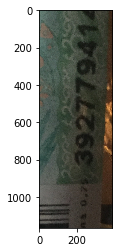

In [16]:
%%time

excise_src = cv2.imread("data/premasked/IMG_0562.JPG")
# excise_src = cv2.imread("data/premasked/IMG_0549.JPG")
cropped = excise_src[78:78+1166, 1276:1276+392]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

The first histogram equalization we just saw, considers the global contrast of the image. In our case, it is not a good idea.

We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, adaptive histogram equalization is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

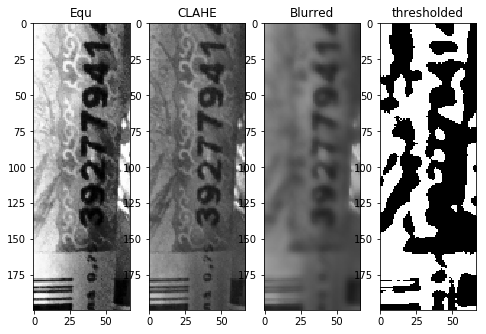

In [24]:
fig = plt.figure(figsize=(10, 150))

resized = imutils.resize(cropped, height=200)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)

a = fig.add_subplot(1, 5, 1)
imgplot = plt.imshow(cv2.cvtColor(equ, cv2.COLOR_GRAY2RGB))
a.set_title('Equ')

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

a = fig.add_subplot(1, 5, 2)
imgplot = plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB))
a.set_title('CLAHE')

blurred = cv2.bilateralFilter(cl1, 9, 75, 75)
blurred = cv2.medianBlur(blurred, 3)

a = fig.add_subplot(1, 5, 3)
imgplot = plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))
a.set_title('Blurred')

# resized = imutils.resize(blurred, height=500)
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
a = fig.add_subplot(1, 5, 4)
imgplot = plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))
a.set_title('thresholded')

plt.show()

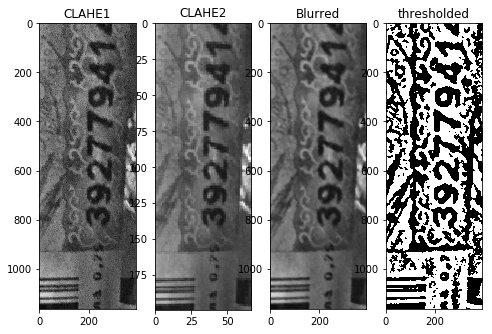

In [32]:
def binarize():
    fig = plt.figure(figsize=(10, 150))

    resized = imutils.resize(cropped, height=200)
    gray2 = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)

    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)
    cl2 = clahe.apply(gray2)

    a = fig.add_subplot(1, 5, 1)
    imgplot = plt.imshow(cv2.cvtColor(cl2, cv2.COLOR_GRAY2RGB))
    a.set_title('CLAHE1')

    a = fig.add_subplot(1, 5, 2)
    imgplot = plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB))
    a.set_title('CLAHE2')

    blurred = cv2.bilateralFilter(cl2, 9, 75, 75)
    blurred = cv2.medianBlur(blurred, 5)

    a = fig.add_subplot(1, 5, 3)
    imgplot = plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))
    a.set_title('Blurred')

    # resized = imutils.resize(blurred, height=500)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    a = fig.add_subplot(1, 5, 4)
    imgplot = plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))
    a.set_title('thresholded')

    plt.show()

    
excise_src = cv2.imread("data/premasked/IMG_0562.JPG")
cropped = excise_src[78:78+1166, 1276:1276+392]
binarize()

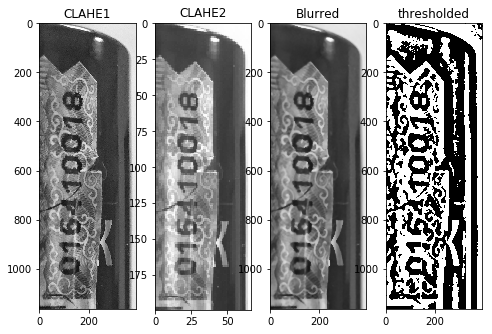

In [33]:
excise_src = cv2.imread("data/premasked/IMG_0549.JPG")
cropped = excise_src[78:78+1166, 1276:1276+392]
binarize()

### We see small moises on image

### a-a-a-a-nd 

# Image Inpainting in the next episode